In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F

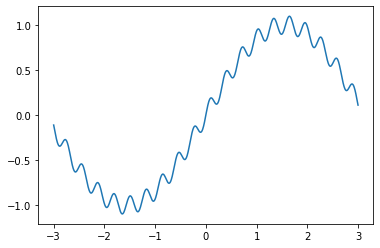

In [2]:
# pytorch only takes 2d x input so we use unsqueeze to insert a dimension of size one
def sum_of_sines(a=1, b=20, w=0.1):
    x = torch.unsqueeze(torch.linspace(-3,3,1000), dim=1)
    y = (torch.sin(a*x) + w*torch.sin(b*x))

    # plot
    plt.plot(x.data.numpy(),y.data.numpy())
    return x, y

x, y = sum_of_sines()

In [3]:
# """
# Square wave

# A(X) = 0.5 + sum(all the odd N's){ 2*sin(nx)/(n*pi) }

# # N_max: the larger the value the steeper the transition from 0 to 1 and the more "square"
# """

# def square_wave(N_max=16):
#     n_odds = torch.arange(1, N_max, 2)
#     xs = torch.unsqueeze(torch.linspace(-6, 6, 1000), dim=1)
#     ys = torch.as_tensor([0.5+sum(np.multiply(2/(n_odds*np.pi), np.sin(n_odds*x))) for x in xs])
#     plt.plot(xs, ys)
    
#     return xs, ys

# xs, ys = square_wave()

In [4]:
class Sine(nn.Module):
    def __init__(self, w0=1.0):
        """Sine activation function with w0 scaling support.
        Example:
            >>> w = torch.tensor([3.14, 1.57])
            >>> Sine(w0=1)(w)
            torch.Tensor([0, 1])
        :param w0: w0 in the activation step `act(x; w0) = sin(w0 * x)`.
            defaults to 1.0
        :type w0: float, optional
        """
        super(Sine, self).__init__()
        self.w0 = w0

    def forward(self, x):
        self._check_input(x)
        return torch.sin(self.w0 * x)
    
    @staticmethod
    def _check_input(x):
        if not isinstance(x, torch.Tensor):
            raise TypeError('input to forward() must be torch.xTensor')

In [5]:
class ThreeLayerNet(nn.Module):
    def __init__(self):
        super(ThreeLayerNet, self).__init__() 
        self.linear_1 = nn.Linear(1, 200) 
        self.linear_2 = nn.Linear(200, 200) 
        self.linear_3 = nn.Linear(200, 1)
        
    def forward(self, x, activation_1, activation_2):
        
        act_1 = F.relu if activation_1 == 'relu' else torch.sin
        act_2 = F.relu if activation_2 == 'relu' else torch.sin   
        
        x = act_1(self.linear_1(x))  # sine
        x = act_2(self.linear_2(x))  # relu 
        
        x = self.linear_3(x)
        return x

In [6]:
def train(x, y, activation_1='relu', activation_2='relu'):
    # init model, optimizer, loss function 
    net = ThreeLayerNet()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
    loss_func = torch.nn.MSELoss()
    
    for t in tqdm(range(3000)):
        prediction = net(x, activation_1, activation_2)
#         prediction = torch.squeeze(prediction)
        loss = loss_func(prediction, y)

        optimizer.zero_grad()
        loss.backward() 
        optimizer.step()

        if (t+1) % 3000 == 0:
            # plot and show learning process
            print()
            plt.plot(x.data, y.data, 'b')
            plt.plot(x.data, prediction.data, 'r-', lw=2)
            plt.text(7.0, 0.5, f'iteration {t+1}, Loss={loss.data}', fontdict={'size': 15, 'color':  'red'})
            plt.pause(0.1)

100%|████████████████████████████████████████████████████████████████████████████▊| 2993/3000 [00:33<00:00, 173.46it/s]

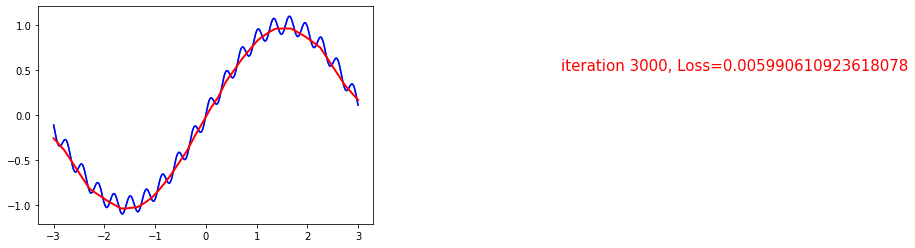

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:34<00:00, 87.94it/s]


In [7]:
x, y = sum_of_sines()
train(x, y, activation_1='relu', activation_2='relu')

100%|█████████████████████████████████████████████████████████████████████████████▊| 2994/3000 [00:34<00:00, 79.02it/s]

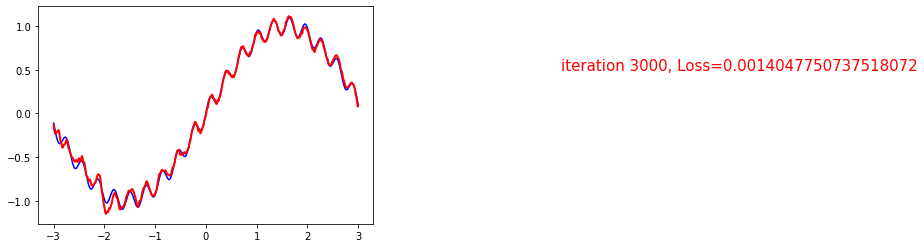

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:35<00:00, 85.05it/s]


In [8]:
train(x, y, activation_1='relu', activation_2='sin')

100%|█████████████████████████████████████████████████████████████████████████████▊| 2992/3000 [00:33<00:00, 72.36it/s]

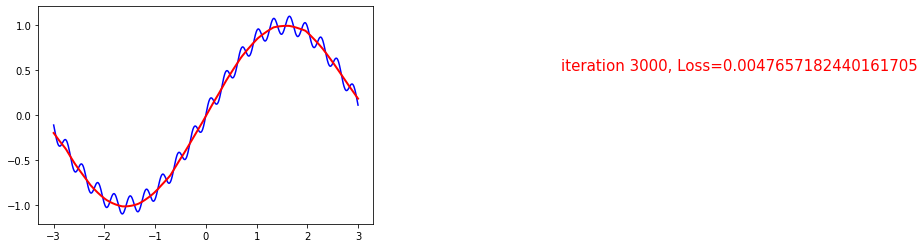

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:33<00:00, 88.76it/s]


In [9]:
train(x, y, activation_1='sin', activation_2='relu')

100%|█████████████████████████████████████████████████████████████████████████████▉| 2999/3000 [00:38<00:00, 58.49it/s]

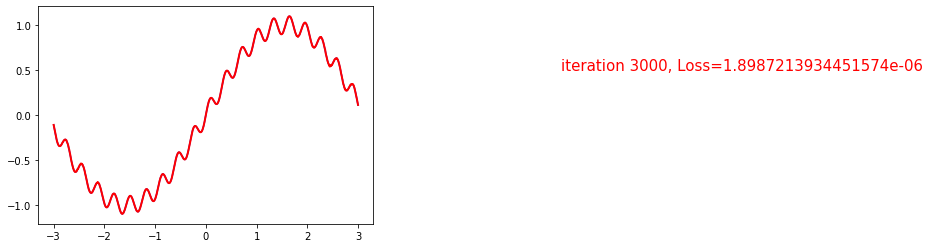

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:38<00:00, 77.56it/s]


In [10]:
train(x, y, activation_1='sin', activation_2='sin')